In [201]:
import pandas as pd

In [202]:
df = pd.read_csv("HR_Dataset.csv")

In [203]:
df.head(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low


In [204]:
df.rename(columns={'satisfaction_level': 'Job_Satisfaction_Score', 
                   'last_evaluation': 'Last_Performance_Eval_Score', 
                   'left' : 'Turnover', 
                   'time_spend_company': 'Tenure',
                    'Departments ':  "Departments"},
                     inplace=True)

# This standardization improves clarity and aligns column names with their respective meanings in the context of employee turnover analysis.



In [205]:
df.columns

Index(['Job_Satisfaction_Score', 'Last_Performance_Eval_Score',
       'number_project', 'average_montly_hours', 'Tenure', 'Work_accident',
       'Turnover', 'promotion_last_5years', 'Departments', 'salary'],
      dtype='object')

In [206]:
df.columns = df.columns.str.strip()


In [207]:
# Function to summarize only categorical columns
def categorical_summary(df):
    # Filter only object or category columns
    categorical_cols = df.select_dtypes(include=['object', 'category'])
    
    # Generate summary for these columns
    summary = pd.DataFrame({
        'Counts': categorical_cols.count(),
        'Uniques': categorical_cols.nunique(),
        'Nulls': categorical_cols.isnull().sum(),
        'Unique Values': [categorical_cols[col].unique() for col in categorical_cols.columns]
    })
    return summary

# Apply the function
cat_summary = categorical_summary(df)

# Display the summary
print(cat_summary)

             Counts  Uniques  Nulls  \
Departments   14999       10      0   
salary        14999        3      0   

                                                 Unique Values  
Departments  [sales, accounting, hr, technical, support, ma...  
salary                                     [low, medium, high]  


In [208]:
print(cat_summary.index)  # Check the index
print(cat_summary.columns)  # Check the columns


Index(['Departments', 'salary'], dtype='object')
Index(['Counts', 'Uniques', 'Nulls', 'Unique Values'], dtype='object')


In [209]:
unique_values_departments = cat_summary.loc['Departments', 'Unique Values']
print(unique_values_departments)


['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


In [210]:
# Custom summary function
def dataframe_summary(df):
    summary = pd.DataFrame({
        'Types': df.dtypes,
        'Counts': df.count(),
        'Nulls': df.isnull().sum(),
        'Min': df.min(numeric_only=True),
        'Max': df.max(numeric_only=True),
    })
    return summary

# Apply the function
summary = dataframe_summary(df)

# Display the summary
print(summary)

                               Types  Counts  Nulls    Min    Max
Departments                   object   14999      0    NaN    NaN
Job_Satisfaction_Score       float64   14999      0   0.09    1.0
Last_Performance_Eval_Score  float64   14999      0   0.36    1.0
Tenure                         int64   14999      0   2.00   10.0
Turnover                       int64   14999      0   0.00    1.0
Work_accident                  int64   14999      0   0.00    1.0
average_montly_hours           int64   14999      0  96.00  310.0
number_project                 int64   14999      0   2.00    7.0
promotion_last_5years          int64   14999      0   0.00    1.0
salary                        object   14999      0    NaN    NaN


- Turnover: Binary variable indicating whether an employee has left the company (1) or not (0).    
- Work_accident: Binary variable indicating whether the employee has had a work accident (1) or not (0).
- promotion_last_5years: Binary variable indicating whether the employee has been promoted in the last five years (1) or not (0).



In [211]:
df.isnull().any()


Job_Satisfaction_Score         False
Last_Performance_Eval_Score    False
number_project                 False
average_montly_hours           False
Tenure                         False
Work_accident                  False
Turnover                       False
promotion_last_5years          False
Departments                    False
salary                         False
dtype: bool

In [212]:
df.duplicated().value_counts()

False    11991
True      3008
Name: count, dtype: int64

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Satisfaction_Score       14999 non-null  float64
 1   Last_Performance_Eval_Score  14999 non-null  float64
 2   number_project               14999 non-null  int64  
 3   average_montly_hours         14999 non-null  int64  
 4   Tenure                       14999 non-null  int64  
 5   Work_accident                14999 non-null  int64  
 6   Turnover                     14999 non-null  int64  
 7   promotion_last_5years        14999 non-null  int64  
 8   Departments                  14999 non-null  object 
 9   salary                       14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [214]:
# Computes the turnover rate by calculating the proportion of turnover ('1') and non-turnover ('0') instances in the 'Turnover' column.

turnover_rate = df.Turnover.value_counts() / len(df)
turnover_rate

Turnover
0    0.761917
1    0.238083
Name: count, dtype: float64

Unbalanced data set

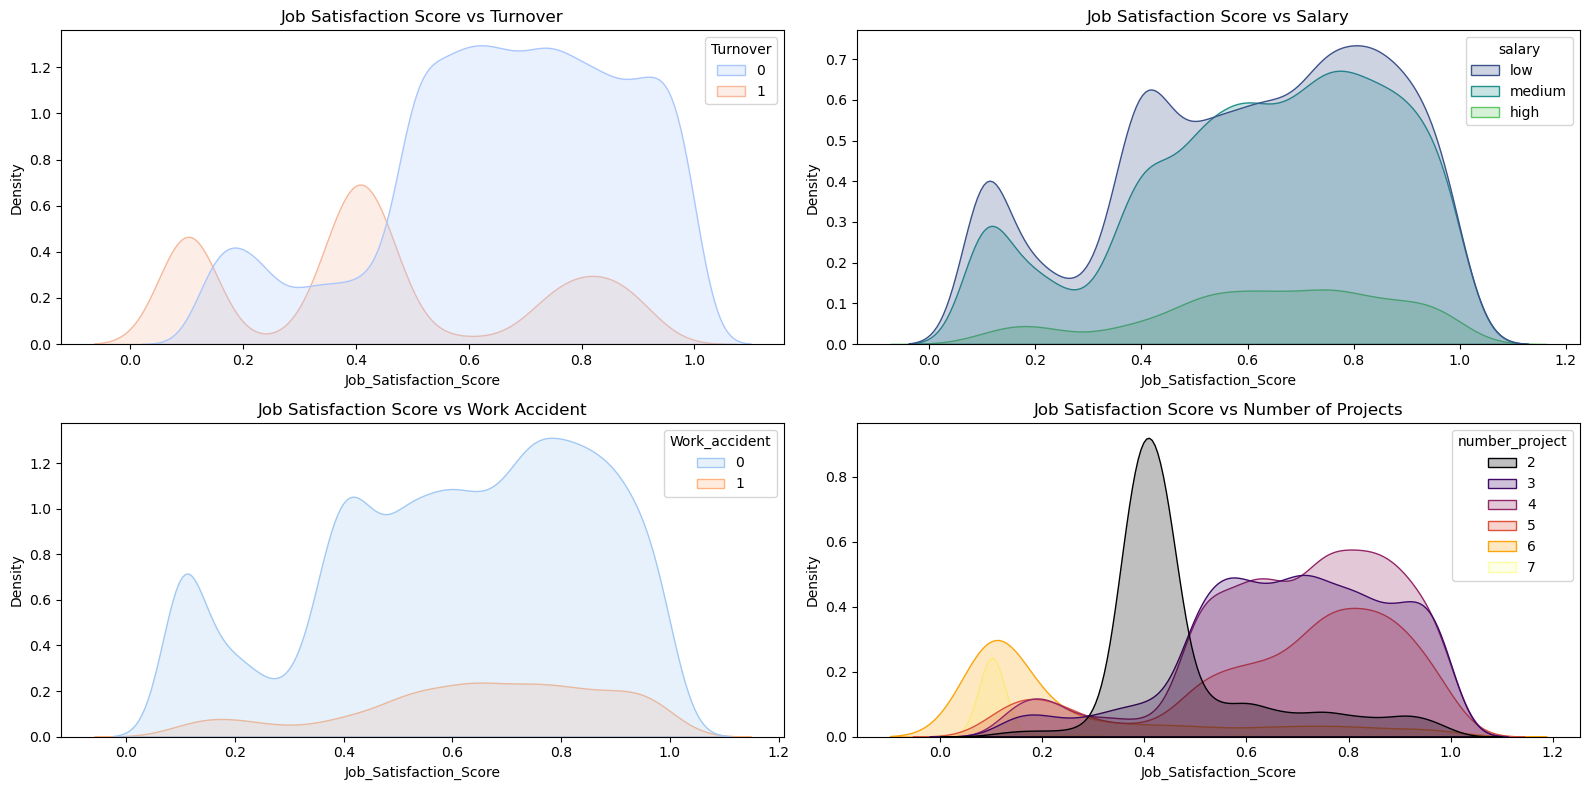

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the data types are correct (optional)
# 'Turnover', 'salary', 'Work_accident', 'number_project' should be categorical or encoded properly

plt.figure(figsize=(16, 8))

# Plot KDE for 'Job_Satisfaction_Score' against different categorical variables

plt.subplot(221)
sns.kdeplot(data=df, x='Job_Satisfaction_Score', hue='Turnover', fill=True, palette='coolwarm')
plt.title('Job Satisfaction Score vs Turnover')

plt.subplot(222)
sns.kdeplot(data=df, x='Job_Satisfaction_Score', hue='salary', fill=True, palette='viridis')
plt.title('Job Satisfaction Score vs Salary')

plt.subplot(223)
sns.kdeplot(data=df, x='Job_Satisfaction_Score', hue='Work_accident', fill=True, palette='pastel')
plt.title('Job Satisfaction Score vs Work Accident')

plt.subplot(224)
sns.kdeplot(data=df, x='Job_Satisfaction_Score', hue='number_project', fill=True, palette='inferno')
plt.title('Job Satisfaction Score vs Number of Projects')

# Show the plot
plt.tight_layout()
plt.show()


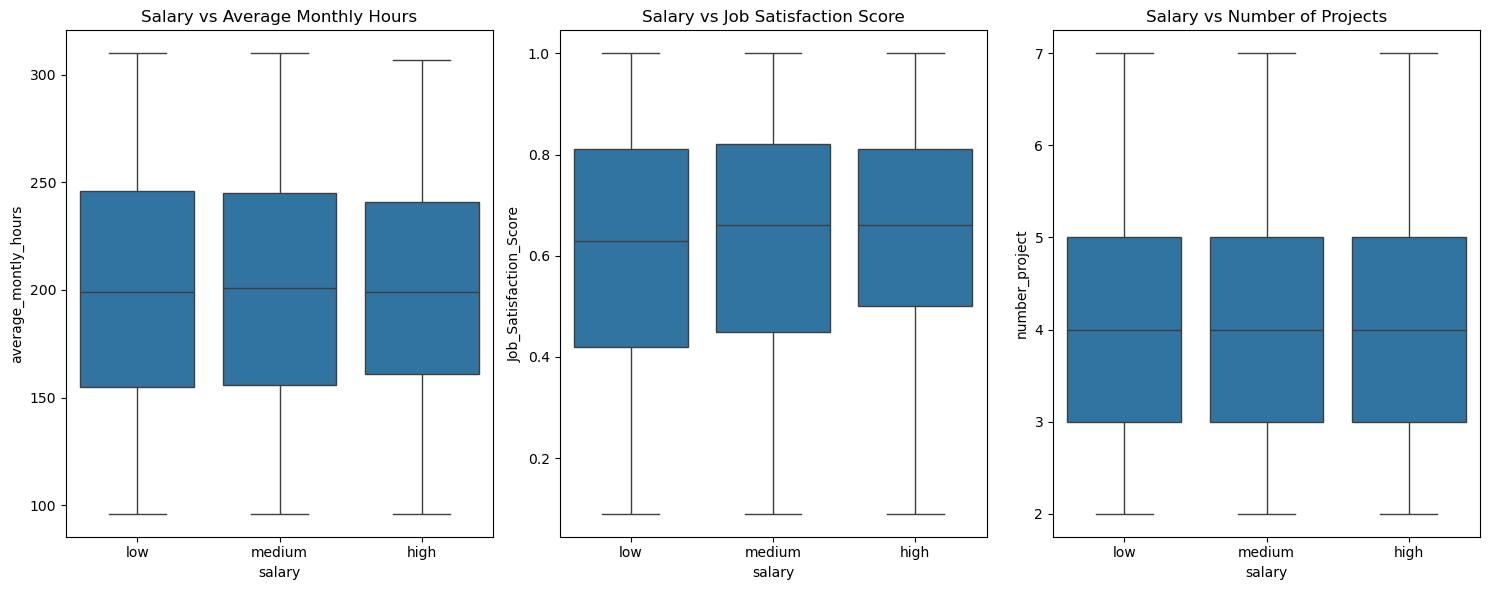

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))

# Boxplot for salary vs average monthly hours
plt.subplot(1, 3, 1)
sns.boxplot(x='salary', y='average_montly_hours', data=df)
plt.title('Salary vs Average Monthly Hours')

# Boxplot for salary vs satisfaction level
plt.subplot(1, 3, 2)
sns.boxplot(x='salary', y='Job_Satisfaction_Score', data=df)
plt.title('Salary vs Job Satisfaction Score')

# Boxplot for salary vs number of projects
plt.subplot(1, 3, 3)
sns.boxplot(x='salary', y='number_project', data=df)
plt.title('Salary vs Number of Projects')

plt.tight_layout()
plt.show()


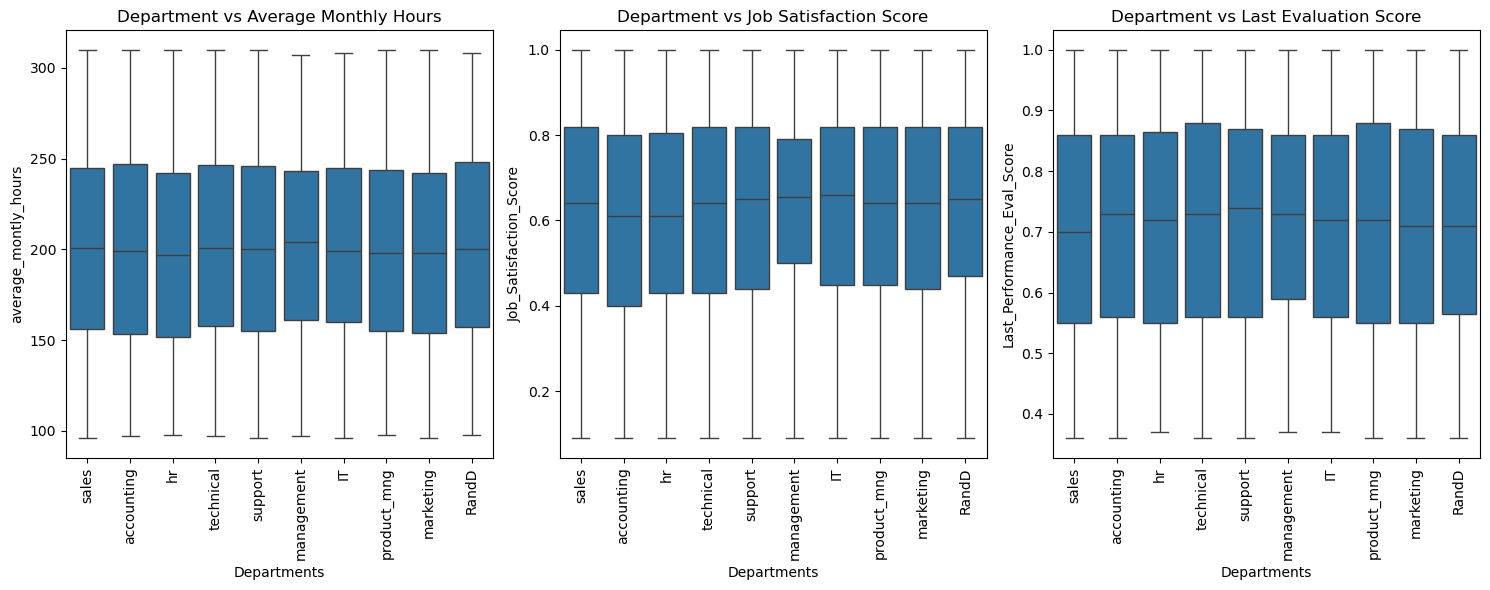

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))

# Boxplot for Department vs Average Monthly Hours
plt.subplot(1, 3, 1)
sns.boxplot(x='Departments', y='average_montly_hours', data=df)
plt.xticks(rotation=90)
plt.title('Department vs Average Monthly Hours')

# Boxplot for Department vs Job Satisfaction Score
plt.subplot(1, 3, 2)
sns.boxplot(x='Departments', y='Job_Satisfaction_Score', data=df)
plt.xticks(rotation=90)
plt.title('Department vs Job Satisfaction Score')

# Boxplot for Department vs Last Evaluation Score
plt.subplot(1, 3, 3)
sns.boxplot(x='Departments', y='Last_Performance_Eval_Score', data=df)
plt.xticks(rotation=90)
plt.title('Department vs Last Evaluation Score')

plt.tight_layout()
plt.show()


- Label Encoding: Converts categorical data into integers(ordinal relationship). Salary column's value can be represented as low:0, medium:1, and high:2
- One-Hot Encoding (don't have any inherent ordinal relationship.): Converts categorical data into multiple binary columns.
- Standardization: Scales numerical data(to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms.)
- Scaling
Some machine learning algorithms are sensitive to `feature scaling` while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:

Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.


In [218]:
# Desired column order
new_order = ['Job_Satisfaction_Score', 'Last_Performance_Eval_Score',
       'number_project', 'average_montly_hours', 'Tenure', 'Work_accident',
         'promotion_last_5years', 'Departments', 'salary', 'Turnover']

# Reorder the columns
df = df[new_order]

In [219]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Tenure', 'average_montly_hours', 'number_project']] = scaler.fit_transform(df[['Tenure', 'average_montly_hours', 'number_project']])


In [220]:
# Apply Label Encoding to the 'salary' column
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['salary'] = label_encoder.fit_transform(df['salary'])

In [221]:
# Apply One-Hot Encoding to the 'Departments' column
df_encoded = pd.get_dummies(df, columns=['Departments'], drop_first=True)


In [222]:
df_encoded

,Job_Satisfaction_Score,Last_Performance_Eval_Score,number_project,average_montly_hours,Tenure,Work_accident,promotion_last_5years,salary,Turnover,Departments_RandD,Departments_accounting,Departments_hr,Departments_management,Departments_marketing,Departments_product_mng,Departments_sales,Departments_support,Departments_technical
0,0.38,0.53,0.0,0.285047,0.125,0,0,1,1,False,False,False,False,False,False,True,False,False
1,0.80,0.86,0.6,0.775701,0.500,0,0,2,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,1.0,0.822430,0.250,0,0,2,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,0.6,0.593458,0.375,0,0,1,1,False,False,False,False,False,False,True,False,False
4,0.37,0.52,0.0,0.294393,0.125,0,0,1,1,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,0.0,0.257009,0.125,0,0,1,1,False,False,False,False,False,False,False,True,False
14995,0.37,0.48,0.0,0.299065,0.125,0,0,1,1,False,False,False,False,False,False,False,True,False
14996,0.37,0.53,0.0,0.219626,0.125,0,0,1,1,False,False,False,False,False,False,False,True,False
14997,0.11,0.96,0.8,0.859813,0.250,0,0,1,1,False,False,False,False,False,False,False,True,False


Turnover                       1.000000
Tenure                         0.144822
average_montly_hours           0.071287
Departments_hr                 0.028249
number_project                 0.023787
Departments_technical          0.020076
Departments_accounting         0.015201
Departments_support            0.010700
Departments_sales              0.009923
Last_Performance_Eval_Score    0.006567
Departments_marketing         -0.000859
salary                        -0.001294
Departments_product_mng       -0.011029
Departments_management        -0.046035
Departments_RandD             -0.046596
promotion_last_5years         -0.061788
Work_accident                 -0.154622
Job_Satisfaction_Score        -0.388375
Name: Turnover, dtype: float64


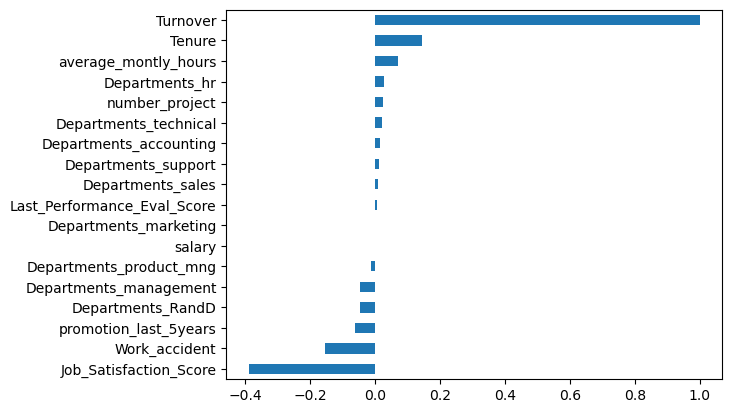

In [223]:
# Step 1: Calculate the correlation matrix for all features and target
correlation_matrix = df_encoded.corr()

# Step 2: Extract correlation between each feature and the target
target_correlation = correlation_matrix["Turnover"]

# Step 3: Display the correlation values
# print(target_correlation)

# Optional: Sort the features by their correlation with the target
sorted_correlation = target_correlation.sort_values(ascending=False)
print(sorted_correlation)
df_encoded.corr()["Turnover"].sort_values().plot.barh();



In [224]:
# First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques.
# Then, you must perform data pre-processing operations such as Scaling and Label Encoding to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms.

In [225]:
# Assuming df is your pandas DataFrame
x = df_encoded.iloc[:, :-1]  # Independent Variables: First 9 columns
y = df_encoded.iloc[:, -1]   # Dependent Variable: 10th column (index 9)


In [226]:
x.columns

Index(['Job_Satisfaction_Score', 'Last_Performance_Eval_Score',
       'number_project', 'average_montly_hours', 'Tenure', 'Work_accident',
       'promotion_last_5years', 'salary', 'Turnover', 'Departments_RandD',
       'Departments_accounting', 'Departments_hr', 'Departments_management',
       'Departments_marketing', 'Departments_product_mng', 'Departments_sales',
       'Departments_support'],
      dtype='object')

In [227]:
from sklearn.model_selection import train_test_split
#Splitting of Data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 46)

In [228]:
# Handling class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=46)
X_resample, y_resample = smote.fit_resample(x_train, y_train)

In [229]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and fit the RandomForest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_resample, y_resample)

# Predict on the test set
y_pred = rf_model.predict(x_test)

In [230]:
# Calculate and print the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

F1_score = f1_score(y_test, y_pred)
print("F1-Score: ", F1_score)


Accuracy:  0.9386666666666666
Precision:  0.7609126984126984
Recall:  0.956359102244389
F1-Score:  0.8475138121546961


In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, 
                           scoring='recall', cv=5)
grid_search.fit(X_resample, y_resample)
RFCM_best_model = grid_search.best_estimator_


In [ ]:
y_pred = RFCM_best_model.predict(x_test)  # Make predictions using the best model
